<a href="https://colab.research.google.com/github/7aslan/TensrFlow_Practice/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to regression with neural netwoks in Tensorflow
Regression : Predicting a numerical variable based on some other combination of variables , even shorter..... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creatin data to view and fit

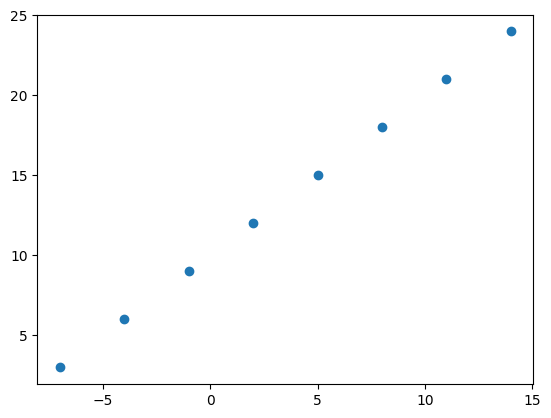

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

In [ ]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

((), ())

In [ ]:
X[0].ndim


0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_Shape = y[0].shape
input_shape, output_shape

(TensorShape([]), ())

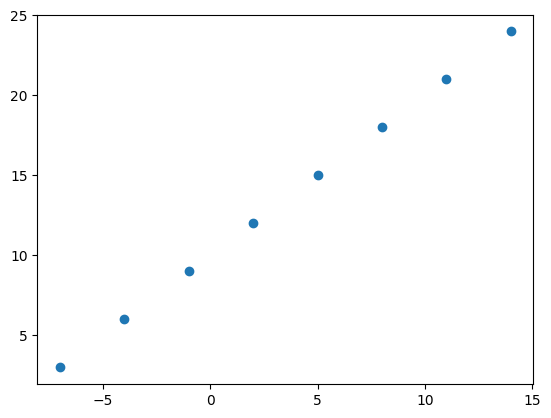

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1. ** Creating a model** - define the input and output layers , as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of or model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastic gradient descent  
              metrics=["mae"] ) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 10.9939 - mae: 10.9939
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 10.8614 - mae: 10.8614
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 10.7289 - mae: 10.7289
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 10.5964 - mae: 10.5964
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.4639 - mae: 10.4639


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 137ms/step


array([[15.197509]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model:

1. **Creating a model** - here we might add more layers , increase the number of hidden units ( all called neurons) within each of the hidden layers , change the activation function of each layer
2. **Compiling model** - here we might change the optimization function or perhaps the **learning rate ** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from )



In [ ]:
# Let's rebuild the model:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model:
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 10.3734 - mae: 10.3734
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2409 - mae: 10.2409
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1084 - mae: 10.1084
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9759 - mae: 9.9759
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8434 - mae: 9.8434
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7109 - mae: 9.7109
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5784 - mae: 9.5784
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4459 - mae: 9.4459
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3134 - mae: 9.3134
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1809 - mae: 9.1809
Epoch 11/100
1/1 [==============================] - 0s 13ms/step

In [ ]:

# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets see if our model 's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 111ms/step


array([[29.678726]], dtype=float32)

In [ ]:
# Lets see if we can make another to improve the model 
#  1. Create the model ( this time with extra hidden layer with 00 hidden units:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model: 
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.6929 - mae: 14.6929
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9804 - mae: 13.9804
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2735 - mae: 13.2735
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5707 - mae: 12.5707
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8692 - mae: 11.8692
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1662 - mae: 11.1662
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4586 - mae: 10.4586
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7436 - mae: 9.7436
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0180 - mae: 9.0180
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2787 - mae: 8.2787
Epoch 11/100
1/1 [==============================] - 0s 12m

In [ ]:
# Lets remind ourselves of the data:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 97ms/step


array([[26.383268]], dtype=float32)

## Evaluating model
In practice ,  a typical workflow you'll go through when building neural network is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

When it comes to evaluation ... there are 3 words you should memorize: 
"Visualize, visualize, visualize"
It is a good ide to visualize 
* The data - what data we working with ? What does it look like?
* The model itself - What does our model look like ?
* The training of a model - How does a model perform while it learns? 
* The prediction of the model - How do the predictions of a model line up against the ground truth (the original label)?

In [ ]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

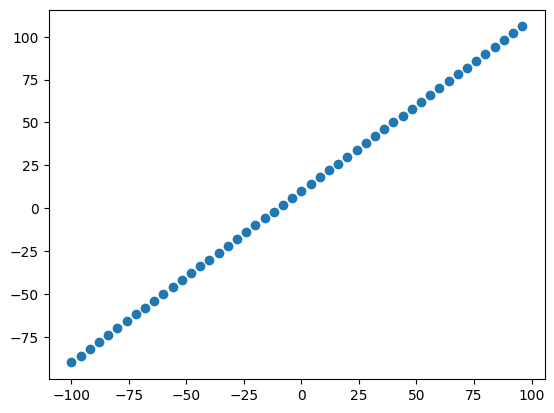

In [ ]:
# Visaize the dataa
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets... 
* **Training set** - the model learns from this data , which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data , which is typically 10-15%  of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned , this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how may samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets:
X_train = X[:40]  # First 40 are training samples(80% of the data)
y_train = y[:40]
X_test = X[40:] # Last 10 are testing samples(20% of data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train) , len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we have got our data in training and test sets... Lets viasualize it again.

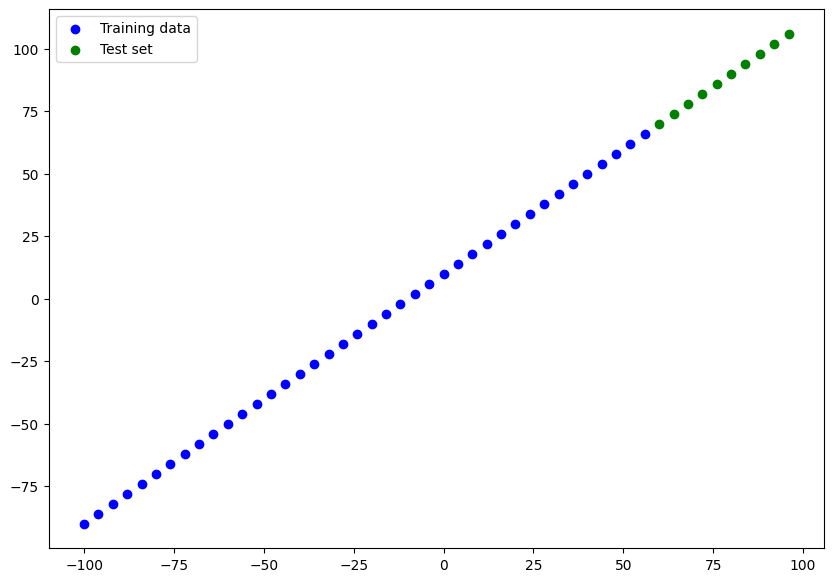

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test , y_test, c="g", label ="Test set")
# Show a legend
plt.legend();

In [ ]:
# Lets have a look at how to build a neural network for our data 
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit model
# model.fit(tf.expand_dims(X_train , axis=-1),y_train, epochs=100)


### Vİsualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Lets create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)
# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =[1], name= "input_layer"), # input_Shape is 1 . coz we re passing at 1 number to predict one number
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])




In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


 * Total params - total number of parametesrs in the model
 * Trainable parameters - these are the parameters(patterns) the model can update as it trains.
 * Non trainable params-  These params arent updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**
 

In [ ]:
# Lets fit our model to training data
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 11.3425 - mae: 11.3425
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0960 - mae: 8.0960
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4144 - mae: 8.4144
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2698 - mae: 8.2698
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5138 - mae: 7.5138
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5715 - mae: 7.5715
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 7.7371 - mae: 7.7371
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4100 - mae: 7.4100
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 7.0796 - mae: 7.0796
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6121 - mae: 7.6121
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 8.01

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


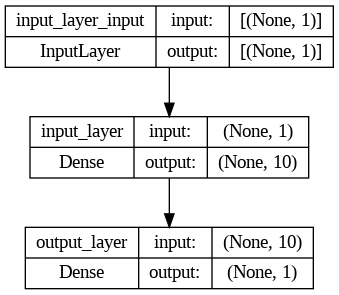

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions
To visualize predictions , it s a good ide to plot them against the ground truth labels.
Often you will see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus your model's prediction)

In [ ]:
# Make some predictions to create y_pred
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 72ms/step


array([[ 73.05373],
       [ 77.24863],
       [ 81.44352],
       [ 85.63842],
       [ 89.83331],
       [ 94.02821],
       [ 98.2231 ],
       [102.41801],
       [106.6129 ],
       [110.80779]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:**  If you fell like you are going to resue some kind of funtionalitiy in the future , it is a good idea to turn it into a function

In [ ]:
# Lets create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_pred):
  """Plots training data , test data and compares predictions to ground truth labels"""
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testinf data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

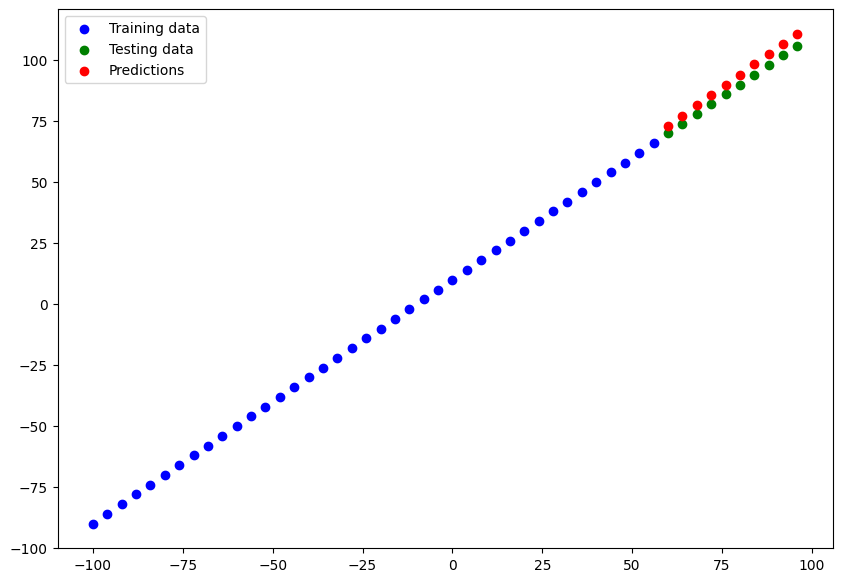

In [ ]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics
Depending on the problem you are working on , there will be different evaluation  metrics to evaluate your model's performance.
Since we are working on a regression , two of the main metrics:
* MAE - mean absolute error, "on average , how wrong is each of my model's predictions" It is used when as a great starter metric for any regression problem.
* MSE - mean squarred error , "square the average errors" . It is used when larger errors are more significant than smaller errors.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 3.9308 - mae: 3.9308


[3.9307618141174316, 3.9307618141174316]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.557019, 12.850824, 11.022593, 10.072316, 10.      , 10.811285,
       12.533859, 15.134405, 18.6129  , 22.807793], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 73.05373],
       [ 77.24863],
       [ 81.44352],
       [ 85.63842],
       [ 89.83331],
       [ 94.02821],
       [ 98.2231 ],
       [102.41801],
       [106.6129 ],
       [110.80779]], dtype=float32)>

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 73.05373,  77.24863,  81.44352,  85.63842,  89.83331,  94.02821,
        98.2231 , 102.41801, 106.6129 , 110.80779], dtype=float32)>

In [ ]:
# Calculate the mae
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.9307618>

In [ ]:
# Calculate the mean squared error :
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=15.764261>

In [ ]:
# Make some functions to reuse mae and mse 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data
2. Make your model larger
3. Train for longer

Let's do 3 modeeling experiments:
1. Model 1 - same as the original model , 1 layer , trained for 100 epochs
2. Model 2 - 2 layers, trained for 100 epochs
3. Model 3 - 2 layers , trained for 500 epochs

### Build model_1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=[mae])
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train , epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 11.8886 - mae: 48.4714
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9494 - mae: 49.6424
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7010 - mae: 47.7503
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 8.3616 - mae: 49.1904
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8935 - mae: 52.7345
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0205 - mae: 55.4372
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4253 - mae: 50.6578
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8565 - mae: 47.1693
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 16.9992 - mae: 43.2257
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 12.5173 - mae: 52.7644
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

1/1 [==============================] - 0s 49ms/step


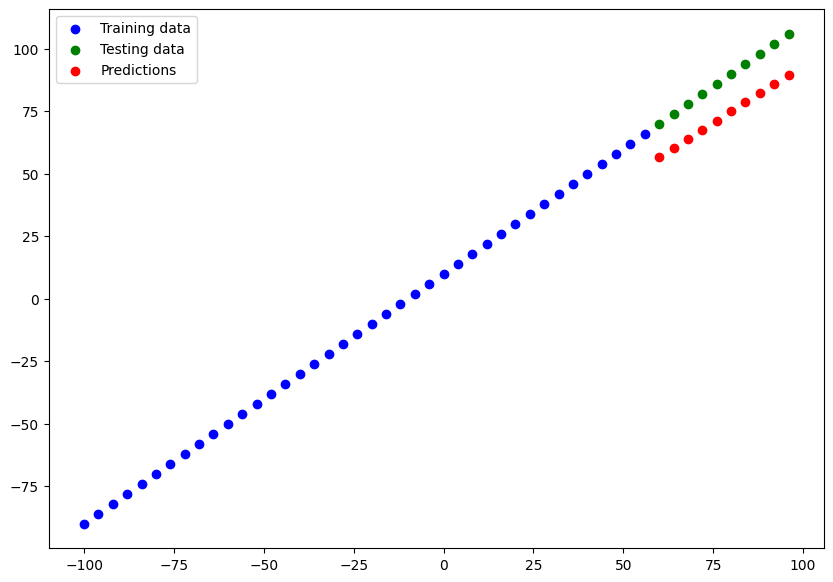

In [ ]:
# Make and plot predictions for model1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.527664],
        [60.209175],
        [63.890686],
        [67.5722  ],
        [71.25371 ],
        [74.93522 ],
        [78.61673 ],
        [82.29824 ],
        [85.97975 ],
        [89.66126 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.527664, 60.209175, 63.890686, 67.5722  , 71.25371 , 74.93522 ,
        78.61673 , 82.29824 , 85.97975 , 89.66126 ], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.905536>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.01187>)

Build model_2
* 2 Dense layers, trained for 100 epochs


In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Fit the model
model_2.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 67.9655 - mae: 67.9655
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 30.0270 - mae: 30.0270
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 20.7405 - mae: 20.7405
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 13.3553 - mae: 13.3553
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 17.4639 - mae: 17.4639
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2191 - mae: 10.2191
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1860 - mae: 11.1860
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1203 - mae: 11.1203
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.5129 - mae: 40.5129
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8978 - mae: 27.8978
Epoch 11/100
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 53ms/step


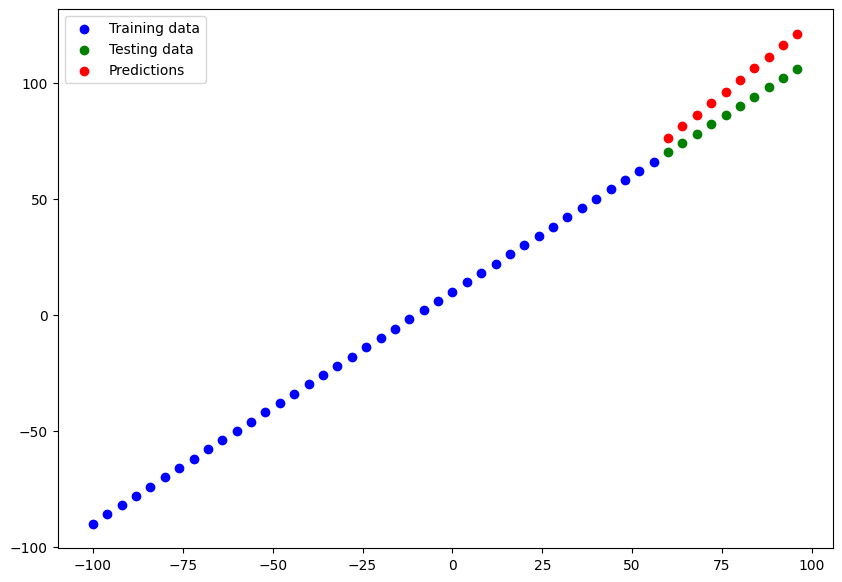

In [ ]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(X_test,y_preds_2)
mse_2 = mse(X_test, y_preds_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=20.669298>,
 <tf.Tensor: shape=(), dtype=float32, numpy=435.01968>)

** Build mode_3**
* 2 layers , trained for 500 epochs

In [ ]:
# Set the random sees
tf.random.set_seed(42)
# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 16ms/step - loss: 48.5715 - mae: 48.5715
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 27.6537 - mae: 27.6537
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 33.3486 - mae: 33.3486
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 24.8363 - mae: 24.8363
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.7168 - mae: 14.7168
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.7207 - mae: 11.7207
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0677 - mae: 11.0677
Epoch 8/500
2/2 [==============================] - 0s 14ms/step - loss: 11.0616 - mae: 11.0616
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.0073 - mae: 40.0073
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4584 - mae: 27.4584
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 98ms/step


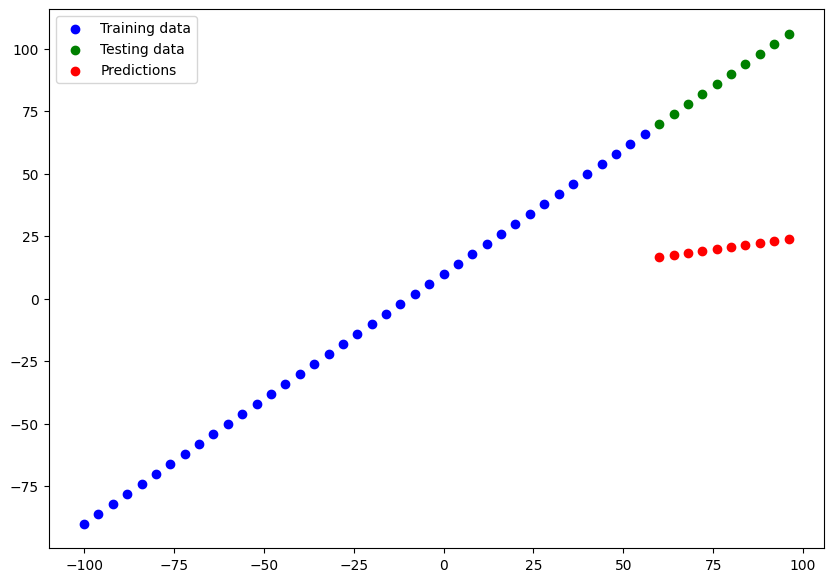

In [ ]:
# make and plot some predictions 
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model 3 evaluation metrics
mae_3 =  mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.58922>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4652.3086>)

** Note: **  You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.





## Comparing the results of our experiments
We have run a few experiments, let's compare the results

In [ ]:
# Lets compare our model's results unsing a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy() , mse_1.numpy()],
                 ["model_2", mae_2.numpy() , mse_2.numpy()],
                 ["model_3", mae_3.numpy() , mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.905536,223.011871
1,model_2,20.669298,435.019684
2,model_3,67.589218,4652.308594


Looks like model 2 perform the best

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which dont work and
in turn, get closer to figuring out what does work. Remember the ML practioners's motto : "Experiment, Experiment, Experiment"

## Tracking your experiments 
One really good habit in ML modelling is to track the results of your experiments.

And When doing so , it can be tedious if you are running lots of experiments
Luckily, there are tools to help us!
**REsource:** As you buil more models , You will want to look into usinf:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all o kinds ıd ML experiments (plugs straight into TensorBoard)

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There aare 2 ain ormats we can save our model's too:
1. The SavedModel Format
2. The HDF5 format

In [ ]:
# Save our model using the SavedModel format
model_1.save("best_model_SavedModel_format")

In [ ]:
# SAve model using the hdf5 format
model_1.save("best_model_HDF5_format.h5")

## Loading a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_1 predictions with SavedModel format model preditions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_1_preds==loaded_SavedModel_format_preds

1/1 [==============================] - 0s 269ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_1 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_1
model_1_preds =  model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 1s 537ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model ( or any other file) from Colab
 If you want to download your files from Colab:
1. You can go to the "files" tab and right click on the file you are after and click "download"
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a file from Colab
#from google.colab import files
#files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# SAve a file from Colab to Drive 
#!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/els

In [ ]:
#!ls /content/drive/MyDrive/els

best_model_HDF5_format.h5  ELS


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# LEts try one-hot encode our DataFrame so it is all numbers

insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train) , len(X_test)

(1338, 1070, 268)

In [ ]:

X


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8719.2666 - mae: 8719.2666
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7888.4849 - mae: 7888.4849
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7607.5747 - mae: 7607.5747
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7712.5381 - mae: 7712.5381
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7666.2627 - mae: 7666.2627
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7608.2993 - mae: 7608.2993
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7575.4087 - mae: 7575.4087
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7788.5225 - mae: 7788.5225
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9771 - mae: 7589.9771
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7727.8530 - mae: 7727.8530

In [ ]:
# Check the resuls of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7384.4209 - mae: 7384.4209


[7384.4208984375, 7384.4208984375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now, it looks like our model isn't performing to well... Let's try and improve it!

To (try) improve our model , we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13289.6133 - mae: 13289.6133
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13138.9443 - mae: 13138.9443
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12817.9736 - mae: 12817.9736
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12179.0889 - mae: 12179.0889
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11088.9678 - mae: 11088.9678
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9651.4121 - mae: 9651.4121
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8282.9551 - mae: 8282.9551
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7562.5674 - mae: 7562.5674
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7426.2466 - mae: 7426.2466
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7405.3301 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5009.2417 - mae: 5009.2417


[5009.24169921875, 5009.24169921875]

In [ ]:
# Set random seed
tf.random.set_seed(42)
# Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )
# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose= 1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13283.7744 - mae: 13283.7744
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13108.5908 - mae: 13108.5908
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12754.0039 - mae: 12754.0039
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12065.6641 - mae: 12065.6641
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10925.4980 - mae: 10925.4980
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9487.1934 - mae: 9487.1934
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8178.0806 - mae: 8178.0806
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7546.5142 - mae: 7546.5142
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7438.7476 - mae: 7438.7476
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7417.4971 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3490.2629 - mae: 3490.2629


[3490.262939453125, 3490.262939453125]

Text(0.5, 0, 'epochs')

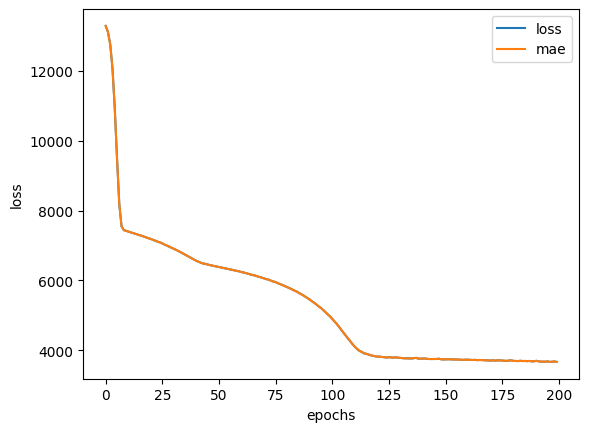

In [ ]:
# Plot history ( also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long sould you train for ?

It depends. Really... It depends on yhe problem you are working ın. However, many people have asked this question before... so 
Tensorflow has a solution which is called as the EarlyStopping Callback

## Preprocessing data (Normalization and Standardization)
In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To preaper our data , We can borrow a few classes from Sci-kit learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)
# Create X & Y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data 
ct.fit(X_train)
#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)      

In [ ]:
# What does our data look like now ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful ! Our data has been normalized and one hot encoded. Now Lets build a neural network model onit and see how it goes.

In [ ]:
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    
])
insurance_model_4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["mae"])
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 3ms/step - loss: 12738.0967 - mae: 12738.0967
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 8315.9375 - mae: 8315.9375
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7286.0791 - mae: 7286.0791
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 5992.4697 - mae: 5992.4697
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 4227.1758 - mae: 4227.1758
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3670.2791 - mae: 3670.2791
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3638.1580 - mae: 3638.1580
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3610.8604 - mae: 3610.8604
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3574.0781 - mae: 3574.0781
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3560.7734 - mae: 3560.77

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 3166.1609 - mae: 3166.1609


[3166.160888671875, 3166.160888671875]

In [ ]:
y_pred = insurance_model_4.predict(X_test_normal)
y_pred

9/9 [==============================] - 0s 3ms/step


array([[ 9192.002  ],
       [ 6022.9893 ],
       [44332.84   ],
       [ 9219.775  ],
       [32329.588  ],
       [ 5595.122  ],
       [ 1186.1063 ],
       [13385.395  ],
       [ 3565.4656 ],
       [10150.821  ],
       [35512.55   ],
       [ 7748.583  ],
       [ 4284.8335 ],
       [40838.28   ],
       [43300.51   ],
       [40552.926  ],
       [10564.721  ],
       [40446.973  ],
       [ 8689.287  ],
       [38801.09   ],
       [ 3858.9822 ],
       [ 7859.1836 ],
       [  660.52386],
       [ 3061.3796 ],
       [10777.213  ],
       [11150.068  ],
       [12075.524  ],
       [ 4827.6387 ],
       [ 9786.963  ],
       [  637.57855],
       [ 8072.878  ],
       [11641.029  ],
       [ 2044.1891 ],
       [ 5118.2876 ],
       [ 2871.0588 ],
       [ 8729.73   ],
       [ 1772.0914 ],
       [ 7734.583  ],
       [41425.87   ],
       [37090.793  ],
       [ 2893.411  ],
       [ 2394.2625 ],
       [11441.067  ],
       [11473.334  ],
       [ 5628.518  ],
       [11

<Axes: ylabel='Frequency'>

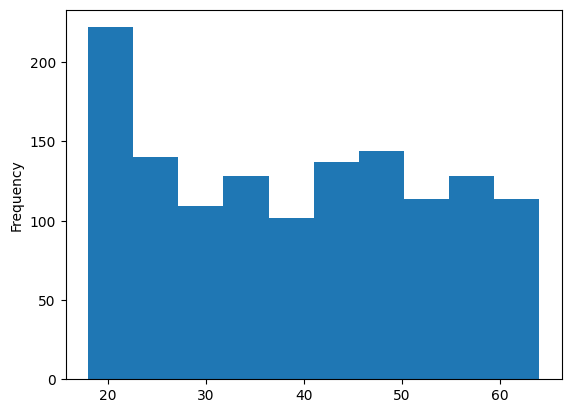

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

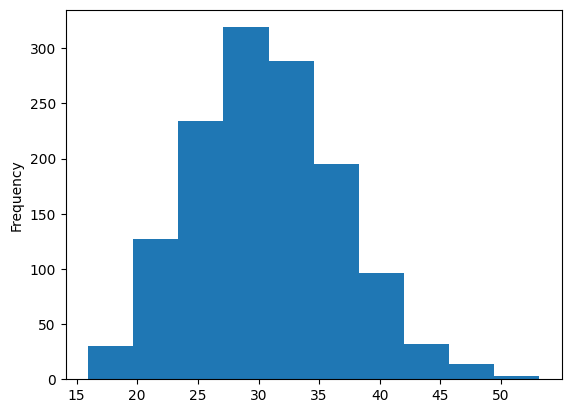

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64